In [1]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm

# Append the scripts folder to the path
sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/week_0/')

In [2]:
from scripts.eda_helpers import read_csv_to_df, describe_df, summary_statistics, check_missing_values,check_outliers,check_incorrect_entries,calculate_correlation_matrix,create_correlation_heatmap,create_pair_plot,create_scatter_matrix,create_polar_plot,analyze_temperature_data,create_histograms,calculate_zscores,create_bubble_charts,create_time_series_plots,clean_data

In [3]:
togo_df=read_csv_to_df('../data/togo-dapaong_qc.csv')
#sierraleone_df=read_csv_to_df('../data/sierraleone-bumbuna.csv')
#benin_df=read_csv_to_df('../data/benin-malanville.csv')


In [4]:
print(togo_df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [5]:
describe_df(togo_df)


Shape: 525600 rows, 19 columns

Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000

In [6]:
summary_statistics(togo_df)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0

## Data Quality Check

In [7]:
check_missing_values(togo_df)

Missing Values:
Comments    525600
dtype: int64


In [8]:
check_outliers(togo_df)


Outliers:
Column: GHI
           GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  WSgust  \
4985    1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8  2.2     2.6   
4995    1112.0  800.3  429.1  1139.0  1120.0  30.5  68.7  3.6     4.4   
195137  1139.0  609.7  543.6  1139.6  1092.0  37.8   4.5  1.0     1.9   
195138  1152.0  619.7  549.9  1155.6  1108.0  37.7   4.4  1.2     1.9   
195139  1155.0  614.7  558.0  1158.6  1112.0  37.7   4.6  1.2     2.1   
...        ...    ...    ...     ...     ...   ...   ...  ...     ...   
510411  1162.0  742.9  453.3  1196.2  1179.0  30.1  69.3  4.8     6.2   
510412  1285.0  862.8  460.8  1309.4  1290.0  30.1  67.8  5.1     6.4   
510413  1202.0  748.9  494.9  1242.3  1225.0  30.1  68.0  4.4     6.4   
510414  1267.0  790.9  514.5  1299.4  1280.0  30.1  68.6  4.0     5.2   
510416  1214.0  699.2  542.7  1244.3  1226.0  30.3  69.2  2.4     4.1   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
4985        0.4  298.

In [9]:
check_incorrect_entries(togo_df)


Incorrect Entries:
No missing values found in column: Timestamp
Column: GHI has negative values.
No negative values found in column: DNI
No negative values found in column: DHI
No negative values found in column: ModA
No negative values found in column: ModB
No negative values found in column: Tamb
No negative values found in column: RH
No negative values found in column: WS
No negative values found in column: WSgust
No negative values found in column: WSstdev
No negative values found in column: WD
No negative values found in column: WDstdev
No negative values found in column: BP
No negative values found in column: Cleaning
No negative values found in column: Precipitation
No negative values found in column: TModA
No negative values found in column: TModB
No negative values found in column: Comments


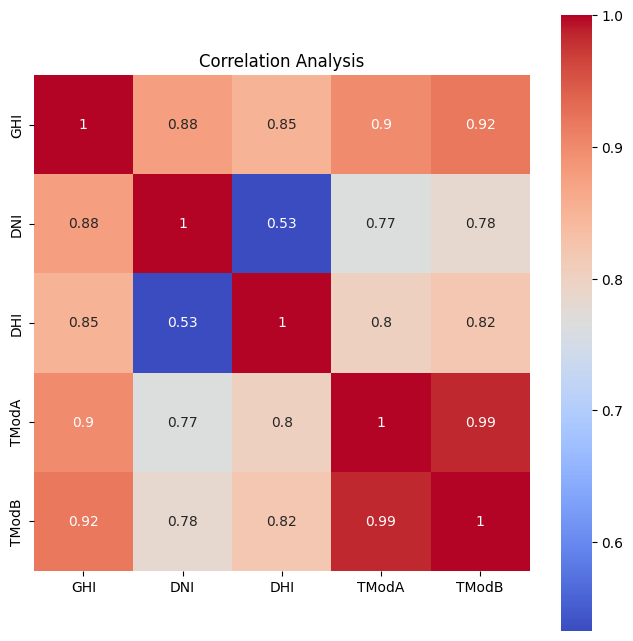

In [10]:
corr_matrix = calculate_correlation_matrix(togo_df)
create_correlation_heatmap(corr_matrix)

<Figure size 1000x800 with 0 Axes>

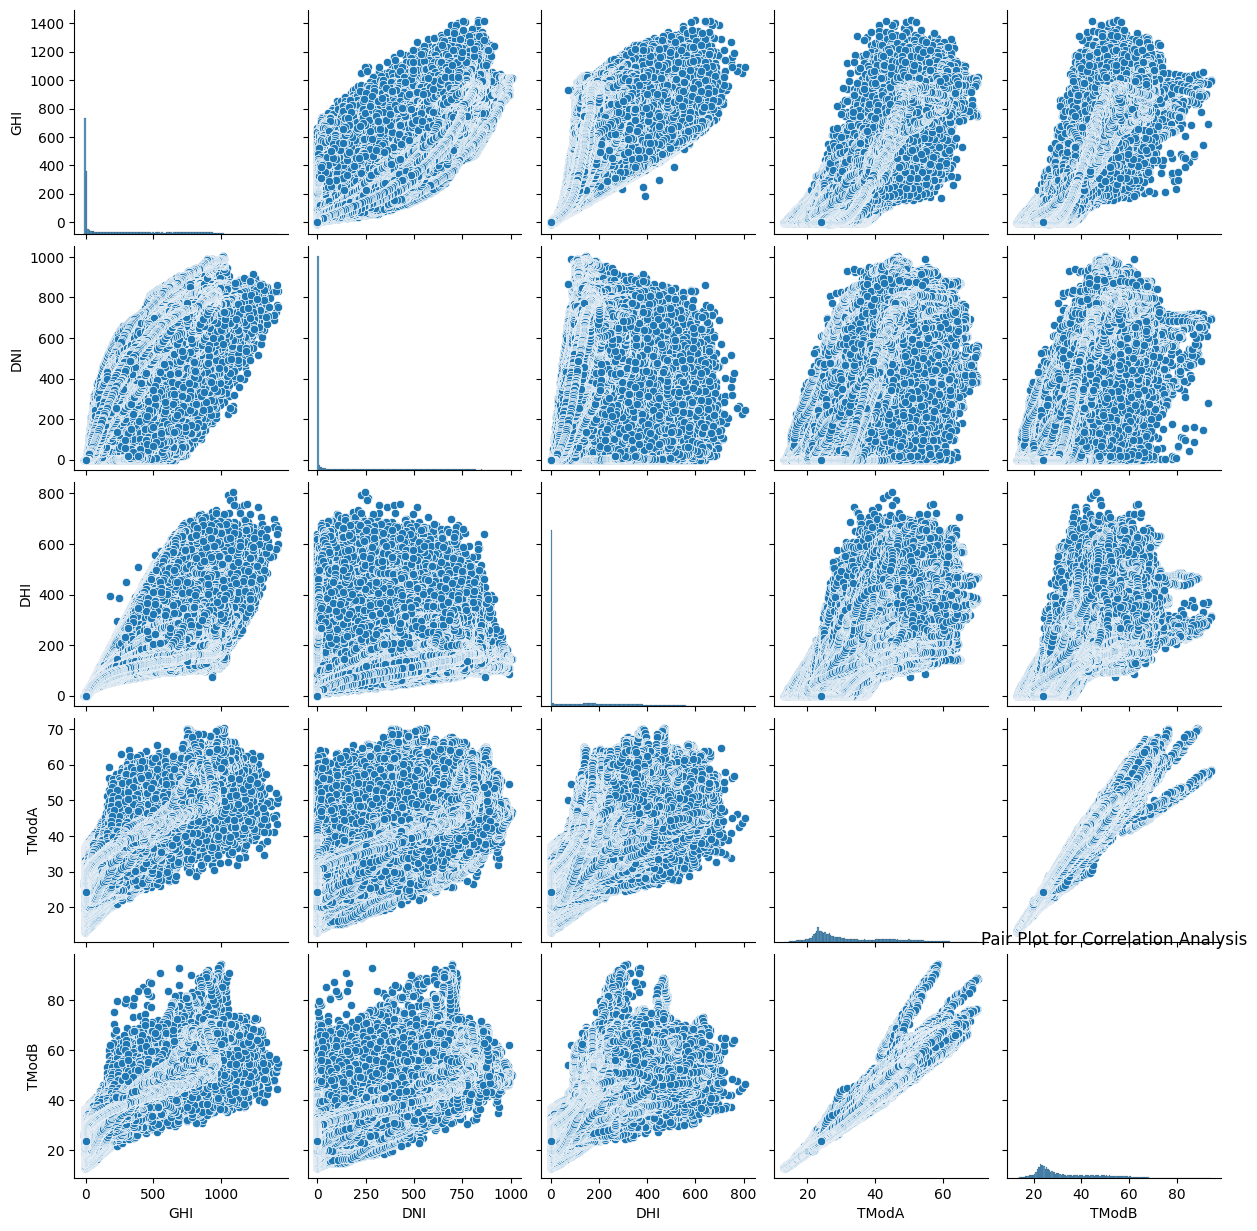

In [11]:
create_pair_plot(togo_df)

<Figure size 1000x800 with 0 Axes>

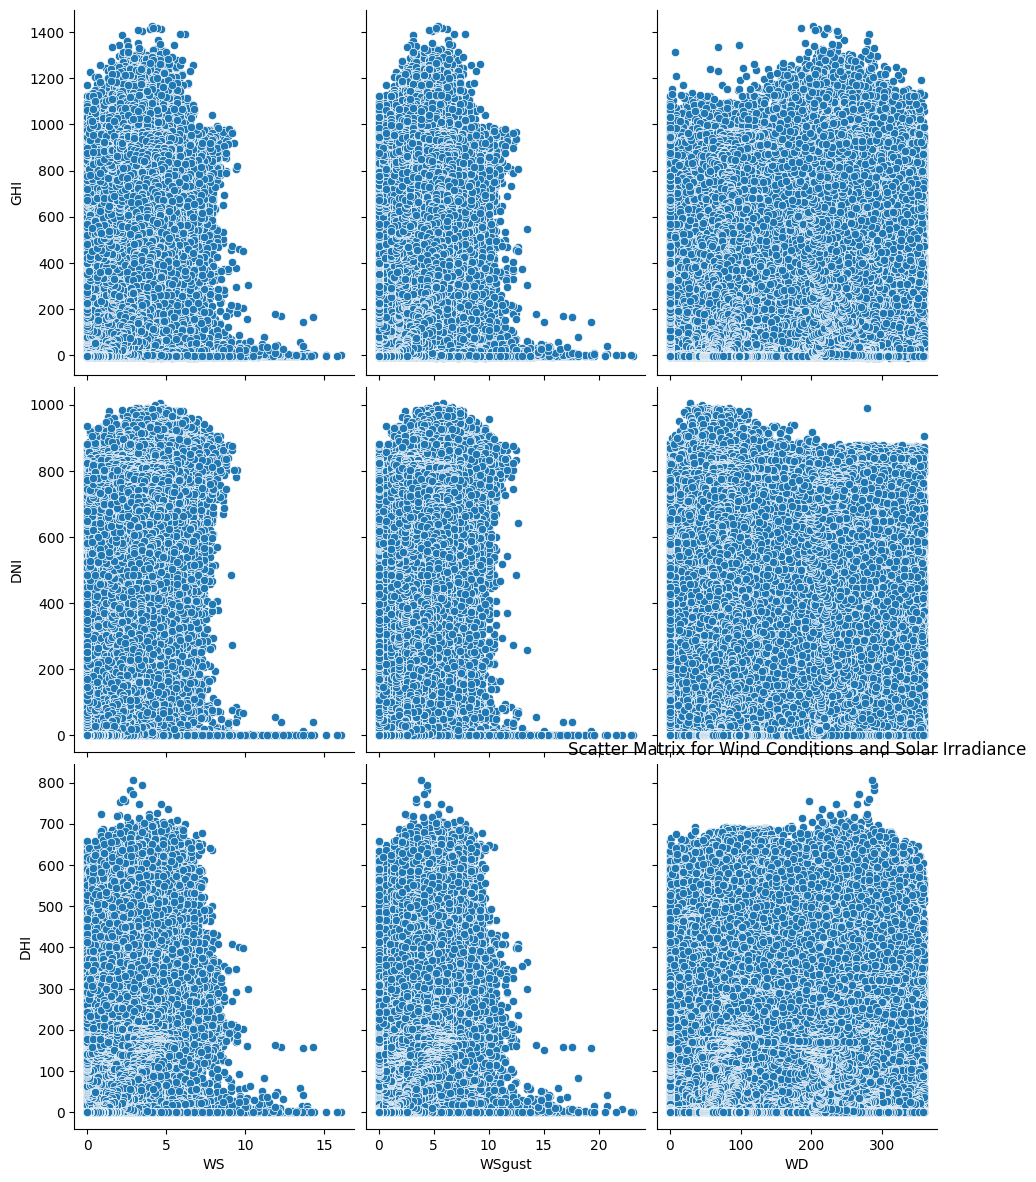

In [12]:
create_scatter_matrix(togo_df)

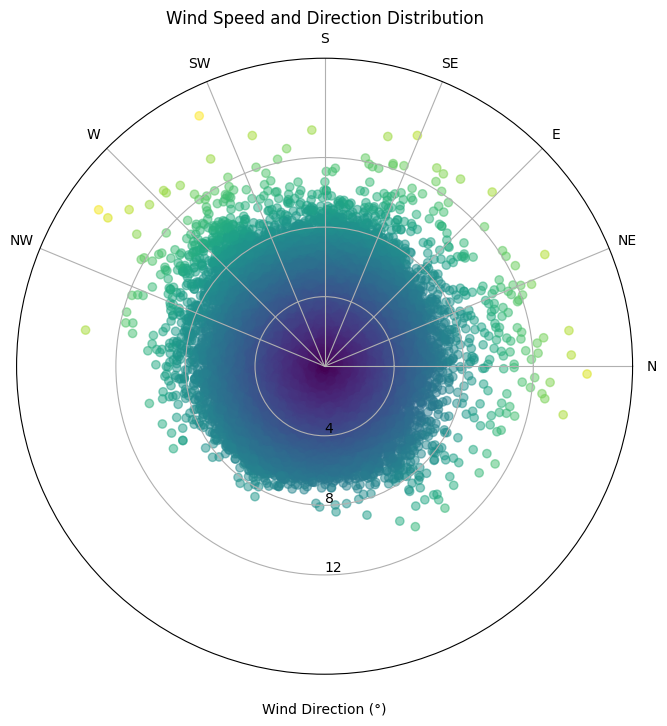

In [13]:
create_polar_plot(togo_df, ws_col='WS', wd_col='WD')

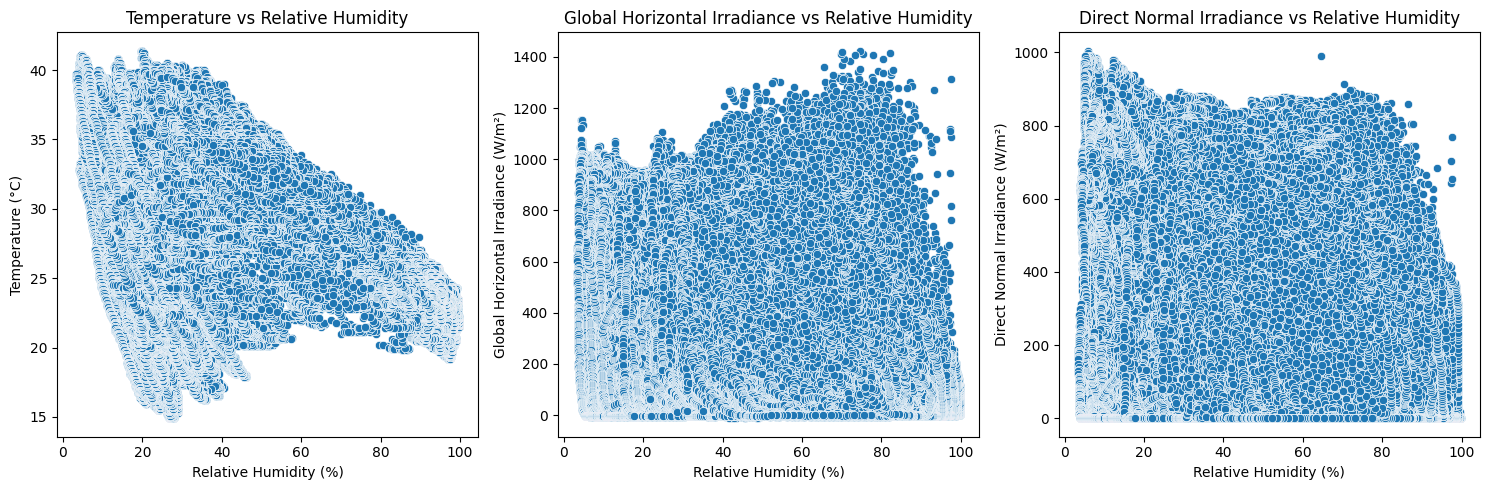

          Tamb        RH       GHI       DNI
Tamb  1.000000 -0.400410  0.562533  0.504499
RH   -0.400410  1.000000 -0.258077 -0.327887
GHI   0.562533 -0.258077  1.000000  0.877293
DNI   0.504499 -0.327887  0.877293  1.000000


In [14]:
analyze_temperature_data(togo_df)

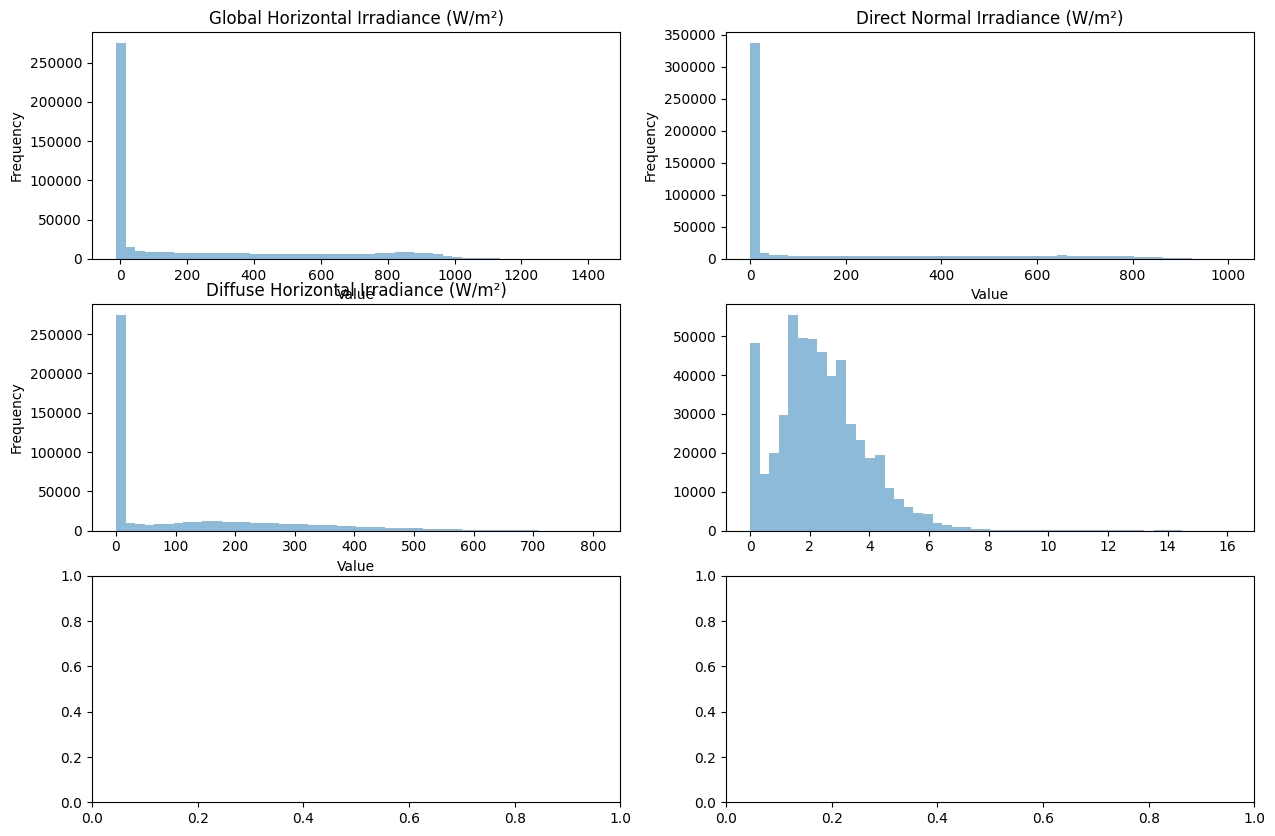

In [15]:
create_histograms(togo_df)

In [16]:
cols = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA']
togo_zdf = calculate_zscores(togo_df, cols)
togo_zdf

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        ...  TModB  Comments    WD_rad  GHI_zscore  DNI_zscore  DHI_zscore  \
0       ...   24.4       NaN  3.972369    0.718858    0.602727    0.743955   
1       ...   24.4       NaN  4.002040    0.718858    0.602727    0.743955   
2       ...   24.4       NaN  3.988077    0.718858    0.602727    0.743955   
3       ...   24.4       NaN  3.998549    0.718548    0.602727    0.743955   
4       ...   24.4       NaN  3.970624    0.718548    0.602727    0.743955   
...     ...    ...       ...       ...         ...         ...         ...   
525595  ...   24.0       NaN  0.000000    0.717308    0.602727    0.743955   
525596  ...   24.0       NaN  0.000000    0.717618    0.602727    0.743955   
525597  ...   23.9       NaN  0.000000    0.717928    0.602727    0.743955   
525598  ...   23.8       NaN  0.000000    0.718238    0.602727    0.743955   
525599  ...   23.8       NaN  0.000000    0.718548    0.602727    0.743955   

        WS_zscore  Tamb_zscore  TModA_zscore  outlier  
0        1.003709     0.620381      0.704143        0  
1        0.866973     0.620381      0.704143        0  
2        0.798605     0.620381      0.704143        0  
3        0.798605     0.620381      0.704143        0  
4        0.730237     0.620381      0.704143        0  
...           ...          ...           ...      ...  
525595   1.619024     0.536313      0.740512        0  
525596   1.619024     0.515296      0.740512        0  
525597   1.619024     0.515296      0.749605        0  
525598   1.619024     0.494278      0.758697        0  
525599   1.619024     0.494278      0.758697        0  

[525600 rows x 27 columns]

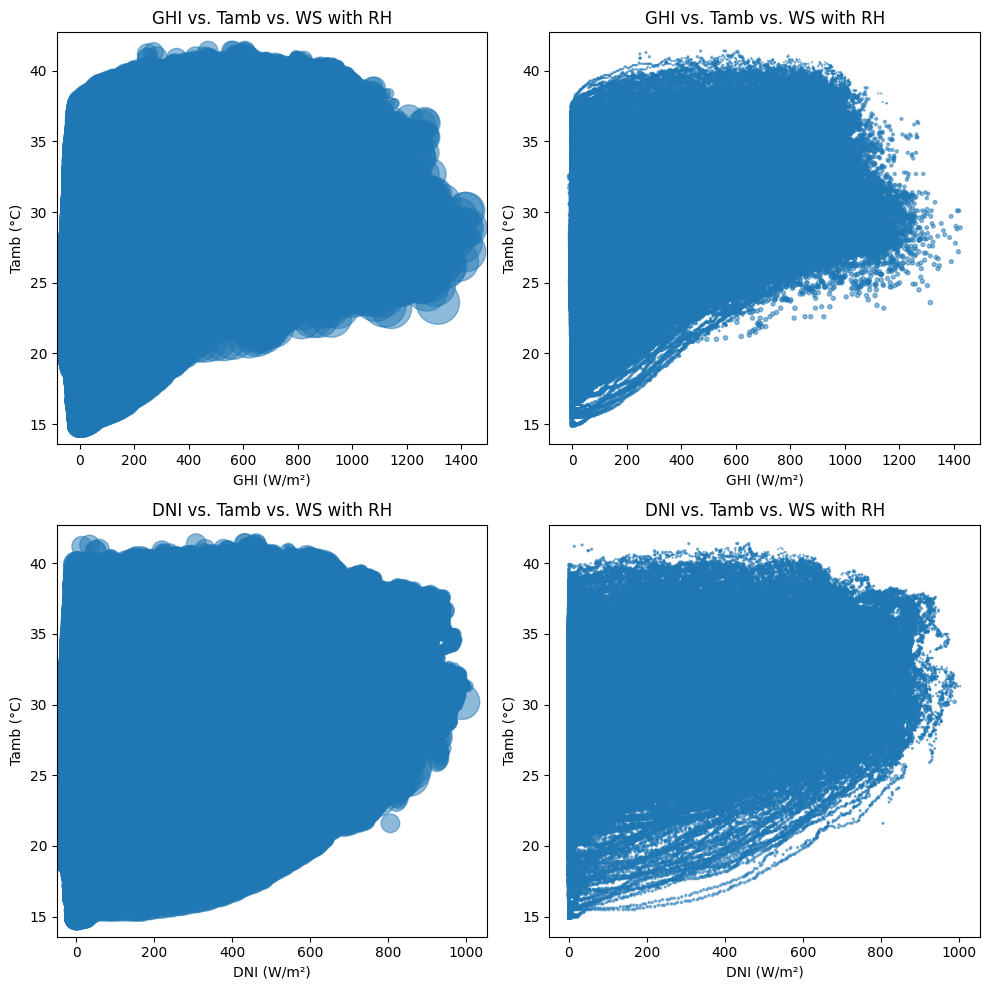

In [17]:
cols = ['GHI', 'DNI', 'Tamb', 'WS']
bubble_col = 'RH'
create_bubble_charts(togo_df, cols, bubble_col)

c:\Users\amanu\OneDrive\Desktop\week_0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


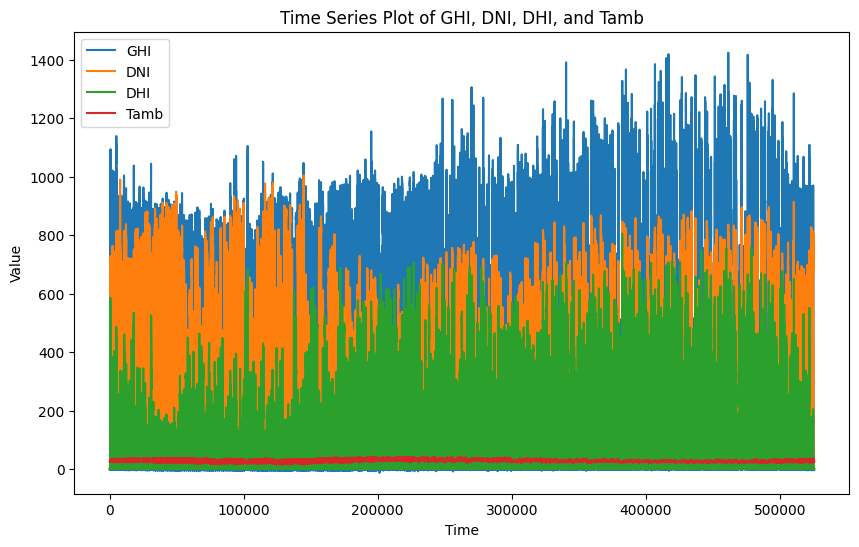

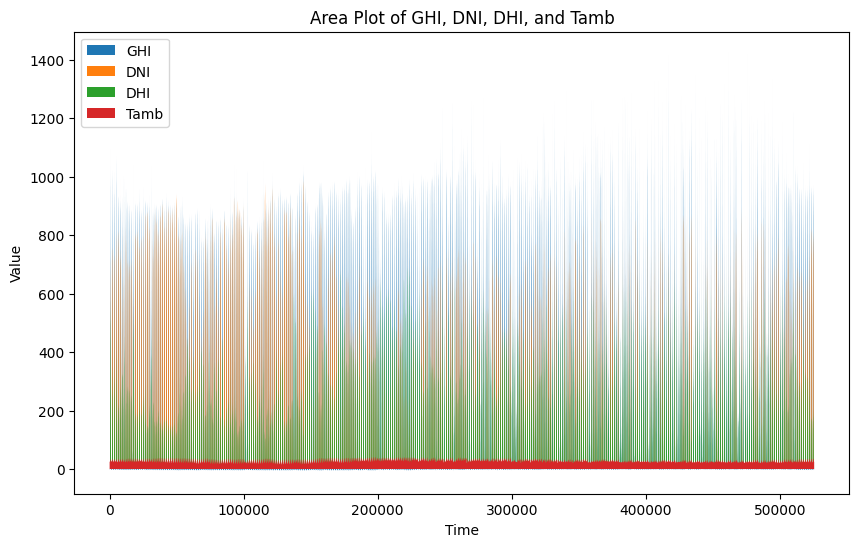

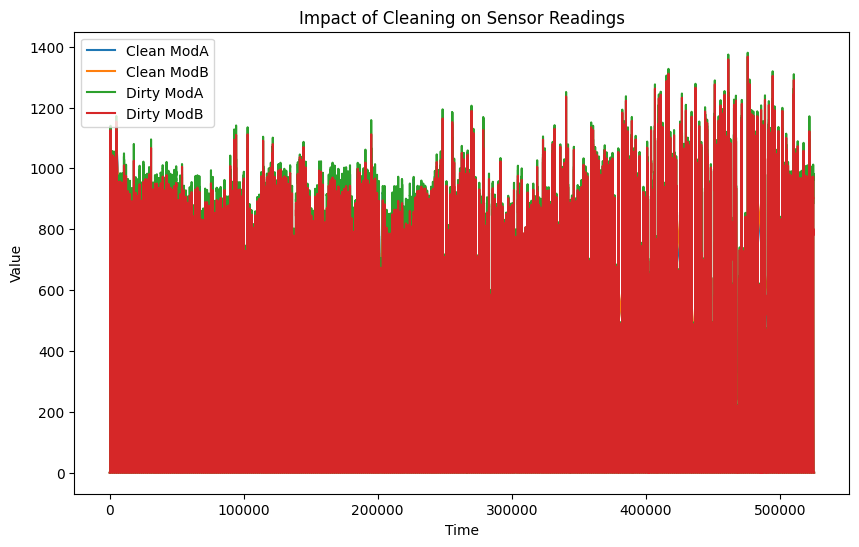

In [18]:
create_time_series_plots(togo_df)

In [19]:
cleaned_togo_df = clean_data(togo_df)

# Print the cleaned togo_df DataFrame
print(cleaned_togo_df)

C:\Users/amanu/OneDrive/Desktop/week_0\scripts\eda_helpers.py:459: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cat_cols] = df[cat_cols].fillna(method='ffill')


               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        ...  TModA  TModB    WD_rad  GH